In [1]:
#importing the needed libraties
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#reading the given bank data with pandas
data = pd.read_excel('Bank_loan_data.xlsx')

In [4]:
#head of the data
data.head()

,ID,Age,Gender,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Home Ownership,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,M,1,49.0,91107,4,1.6,1,0,Home Owner,0,1,0,0.0,0
1,2,45,M,19,34.0,90089,3,1.5,1,0,Rent,0,1,0,0.0,0
2,3,39,M,15,11.0,94720,1,1.0,1,0,Rent,0,0,0,0.0,0
3,4,35,M,9,100.0,94112,1,2.7,2,0,Rent,0,0,0,0.0,0
4,5,35,M,8,45.0,91330,4,1.0,2,0,Rent,0,0,0,0.0,1


In [5]:
# dictionary of a data columns with its provided desctioptions
data_description = {'ID': 'ID of the customer','Age': 'Age of the customer','Gender':' M for Male, F for Female and O for Others',
                    'Experience': 'Amount of work experience in years', 'Income': 'Amount of annual income (in thousands)','Home Ownership': 'Home Owner, Rent and Home Mortgage.',
                    'Zipcode':'Postal code in which the client lives','Family': 'Number of family members','CCAvg': 'Average monthly spending with the credit card (in thousands)',
                'Education': "Education level (1: bachelor's degree, 2: master's degree, 3:advanced/professional degree)", 'Securities Account': 'Does the customer have a securities account with the bank?',
                    'Online': 'Does the customer use the internet banking facilities?','CreditCard': 'Does the customer use a credit card issued by the bank?', 'Personal Loan': 'Did this customer accept the personal loan offered in the last campaign?'
                   }

In [6]:
#converting the data dictionary into list and into dataframe with the index column name 
description_df = pd.DataFrame(list(data_description.items()), columns=['Columns', 'Description'])
description_df.set_index('Columns',inplace=True)

In [7]:
description_df

,Description
Columns,
ID,ID of the customer
Age,Age of the customer
Gender,"M for Male, F for Female and O for Others"
Experience,Amount of work experience in years
Income,Amount of annual income (in thousands)
Home Ownership,"Home Owner, Rent and Home Mortgage."
Zipcode,Postal code in which the client lives
Family,Number of family members
CCAvg,Average monthly spending with the credit card ...


In [8]:
# defining the function to fetch the description of the data columns
def fetch_desctipt(col_name):
    return description_df.loc[col_name]['Description']

In [9]:
#fetch_desctipt('Gender')

In [10]:
#customer Id is irrevalent so we discard this column
data.drop('ID',inplace=True,axis=1)

In [11]:
data.head()

,Age,Gender,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Home Ownership,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,M,1,49.0,91107,4,1.6,1,0,Home Owner,0,1,0,0.0,0
1,45,M,19,34.0,90089,3,1.5,1,0,Rent,0,1,0,0.0,0
2,39,M,15,11.0,94720,1,1.0,1,0,Rent,0,0,0,0.0,0
3,35,M,9,100.0,94112,1,2.7,2,0,Rent,0,0,0,0.0,0
4,35,M,8,45.0,91330,4,1.0,2,0,Rent,0,0,0,0.0,1


In [12]:
#data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Gender              3404 non-null   object 
 2   Experience          5000 non-null   int64  
 3   Income              4933 non-null   float64
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Home Ownership      3811 non-null   object 
 10  Personal Loan       5000 non-null   object 
 11  Securities Account  5000 non-null   int64  
 12  CD Account          5000 non-null   int64  
 13  Online              4960 non-null   float64
 14  CreditCard          5000 non-null   int64  
dtypes: float64(3), int64(9), object(3)
memory usage: 586.1+

Through the above information, we can find: columns Gender, Income, Home Ownership, and Online have missing values 

In [13]:
#description the the data with intger and float values
data.describe()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,4933.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,4960.000000,5000.000000
mean,46.008200,20.104600,72.758159,93152.503000,2.396400,1.937913,1.880600,56.498800,0.104400,0.06040,0.596976,0.294000
std,25.444898,11.467954,45.425519,2121.852197,1.147663,1.747666,0.839812,101.713802,0.305809,0.23825,0.490555,0.455637
min,0.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,63.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,95.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.00000,1.000000,1.000000
max,978.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.00000,1.000000,1.000000


Here we can see the max age is 978 and min age is 0 which is not possible in the give case scenerio
Experience -3, which is minumum experience, also not valid input to the experience column

In [14]:
#data[data['Age'] == 978]

In [15]:
data['Age']>1

0       True
1       True
2       True
3       True
4       True
        ... 
4995    True
4996    True
4997    True
4998    True
4999    True
Name: Age, Length: 5000, dtype: bool

In [16]:
data[data['Age']>100]

,Age,Gender,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Home Ownership,Personal Loan,Securities Account,CD Account,Online,CreditCard
53,567,M,26,190.0,90245,3,2.1,3,240,Rent,1,0,0,1.0,0
131,122,M,34,149.0,93720,4,7.2,2,0,Rent,1,0,1,1.0,1
765,978,M,21,109.0,95822,4,1.8,1,0,Rent,1,0,0,0.0,0
2005,786,F,23,170.0,90254,2,6.5,2,0,Home Mortage,1,0,1,1.0,1
2101,600,M,5,203.0,95032,1,10.0,3,0,Home Mortage,1,0,0,0.0,0
2541,797,M,8,171.0,90212,2,2.2,2,569,Home Owner,1,0,0,1.0,0


In [17]:
fetch_desctipt('Age')

'Age of the customer'

Here Age column define the age of the customers. So, data having Age above 100 can be discard 

In [18]:
data.drop(data[data['Age']>100].index,inplace= True)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4994 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 4994 non-null   int64  
 1   Gender              3398 non-null   object 
 2   Experience          4994 non-null   int64  
 3   Income              4927 non-null   float64
 4   ZIP Code            4994 non-null   int64  
 5   Family              4994 non-null   int64  
 6   CCAvg               4994 non-null   float64
 7   Education           4994 non-null   int64  
 8   Mortgage            4994 non-null   int64  
 9   Home Ownership      3805 non-null   object 
 10  Personal Loan       4994 non-null   object 
 11  Securities Account  4994 non-null   int64  
 12  CD Account          4994 non-null   int64  
 13  Online              4954 non-null   float64
 14  CreditCard          4994 non-null   int64  
dtypes: float64(3), int64(9), object(3)
memory usage: 624.2+ KB


In [20]:
#data[data['Age']>=100]

In [21]:
#data[data['Experience']<0].count()

In [22]:
fetch_desctipt('Experience')

'Amount of work experience in years'

well, amount of work experiece cannot be lesser than 0 solet's make all values lesser than 0 be 0

In [23]:
data['Experience'] = data['Experience'].apply(lambda expri: 0 if expri < 0 else expri)

Now data_column 'Gender' have a missing values let's solve that issre

In [24]:
#data['Gender'].unique()

In [25]:
#fetch_desctipt('Gender')

Now replacing the values with 'O' i.e others if they are not in category of M and F

In [26]:
data['Gender'] = data['Gender'].apply(lambda x : 'O' if x not in [ 'M','F'] else x)

In [27]:
data['Gender'].unique()

array(['M', 'F', 'O'], dtype=object)

In [28]:
fetch_desctipt('Personal Loan')

'Did this customer accept the personal loan offered in the last campaign?'

In [29]:
data['Personal Loan'].unique()

array([0, 1, ' '], dtype=object)

In [30]:
data[data['Personal Loan'] == ' ']

,Age,Gender,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Home Ownership,Personal Loan,Securities Account,CD Account,Online,CreditCard
42,32,M,7,132.0,90019,4,1.1,2,412,Home Mortage,,0,0,1.0,0


One value of Personal Loan is empty so replacing the empty space with 0 and converting it's datatype

In [31]:
data['Personal Loan'] = data['Personal Loan'].replace(' ',0)
data['Personal Loan'] = data['Personal Loan'].astype(int)

C:\Users\User\AppData\Local\Temp\ipykernel_18388\4136552752.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Personal Loan'] = data['Personal Loan'].replace(' ',0)


In [32]:
#(data['Personal Loan'].dtype)

In [33]:
#['Personal Loan'].unique()

Now checking other null values

In [34]:
#data.isnull().sum()

In [35]:
#data[data['Income'].isnull()]

Now replacing the NaN value of income with 0

In [36]:
data['Income'].fillna(0,inplace = True)

C:\Users\User\AppData\Local\Temp\ipykernel_18388\2496502078.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Income'].fillna(0,inplace = True)


In [37]:
data['Income'].isnull().sum()

0

In [38]:
data['Home Ownership'].unique()

array(['Home Owner', 'Rent', 'Home Mortage', nan], dtype=object)

In [39]:
data['Home Ownership'].isnull().sum()

1189

Now filling the NaN value of home Ownership with 'Other' value

In [40]:
data['Home Ownership'].fillna('Others',inplace = True)

C:\Users\User\AppData\Local\Temp\ipykernel_18388\1499684559.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Home Ownership'].fillna('Others',inplace = True)


In [41]:
data['Home Ownership'].isnull().sum()

0

In [42]:
data['Online'].unique()

array([ 0.,  1., nan])

In [43]:
fetch_desctipt('Online')

'Does the customer use the internet banking facilities?'

Now filling the null value of Online column with 0

In [44]:
data['Online'].fillna(0,inplace = True)

C:\Users\User\AppData\Local\Temp\ipykernel_18388\875958593.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Online'].fillna(0,inplace = True)


In [45]:
data.isnull().sum()

Age                   0
Gender                0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Home Ownership        0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

Now we have no null values

<Axes: xlabel='Personal Loan', ylabel='count'>

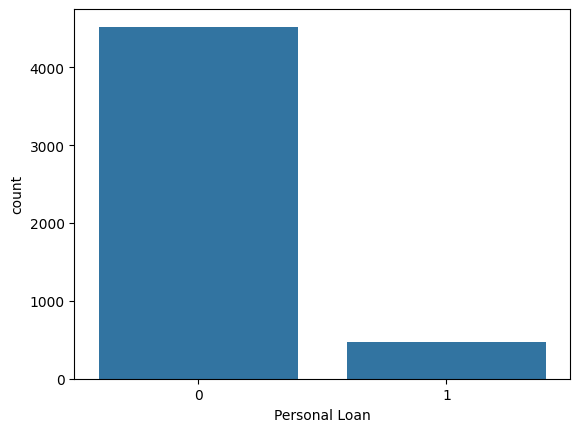

In [46]:
sns.countplot(data=data, x='Personal Loan')

Here in this data we have very little number of customers who accepted the personal loan

<Axes: xlabel='Personal Loan', ylabel='Income'>

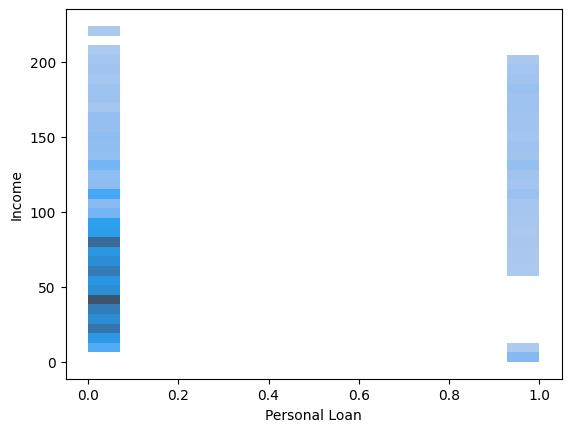

In [47]:
sns.histplot(data=data, x='Personal Loan',y='Income')

<Axes: xlabel='Personal Loan', ylabel='Income'>

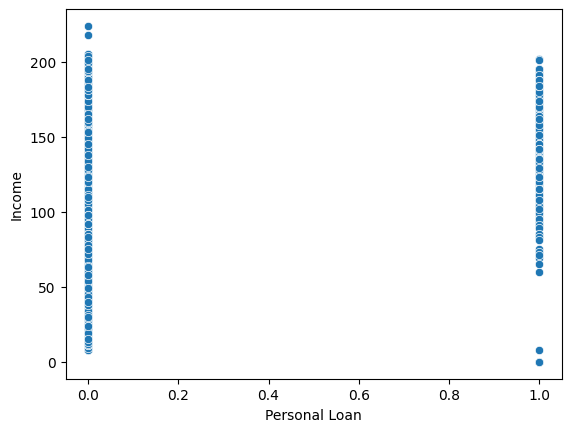

In [48]:
sns.scatterplot(data=data, x='Personal Loan',y='Income')

Now converting the given data into machine understanding for i.e 0 and 1

In [49]:
data['Gender'] = data['Gender'].apply(lambda x: 1 if x == 'M' else (2 if x == 'F' else 0))

In [50]:
data['Gender'].unique()

array([1, 2, 0], dtype=int64)

In [51]:
gender_dummies = pd.get_dummies(data['Gender'], prefix='Gender')

In [52]:
gender_dummies.rename(columns= {'Gender_0':'Other_Genders','Gender_1':'Male','Gender_2':'Female'},inplace=True)

In [53]:
data = pd.concat([data, gender_dummies], axis=1)

In [54]:
data

,Age,Gender,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Home Ownership,Personal Loan,Securities Account,CD Account,Online,CreditCard,Other_Genders,Male,Female
0,25,1,1,49.0,91107,4,1.6,1,0,Home Owner,0,1,0,0.0,0,False,True,False
1,45,1,19,34.0,90089,3,1.5,1,0,Rent,0,1,0,0.0,0,False,True,False
2,39,1,15,11.0,94720,1,1.0,1,0,Rent,0,0,0,0.0,0,False,True,False
3,35,1,9,100.0,94112,1,2.7,2,0,Rent,0,0,0,0.0,0,False,True,False
4,35,1,8,45.0,91330,4,1.0,2,0,Rent,0,0,0,0.0,1,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,0,3,40.0,92697,1,1.9,3,0,Others,0,0,0,1.0,0,True,False,False
4996,30,0,4,15.0,92037,4,0.4,1,85,Others,0,0,0,1.0,0,True,False,False
4997,63,0,39,24.0,93023,2,0.3,3,0,Others,0,0,0,0.0,0,True,False,False
4998,65,0,40,49.0,90034,3,0.5,2,0,Others,0,0,0,1.0,0,True,False,False


In [55]:
data.drop(columns=['Gender'], inplace=True)

In [56]:
data[['Other_Genders', 'Male', 'Female']] = data[['Other_Genders', 'Male', 'Female']].astype(int)

In [57]:
data[['Other_Genders', 'Male', 'Female']]

,Other_Genders,Male,Female
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
4995,1,0,0
4996,1,0,0
4997,1,0,0
4998,1,0,0


Now making the dummies for Home Ownership too

In [58]:
home_owner_dummies = pd.get_dummies(data['Home Ownership'])

In [59]:
home_owner_dummies.rename(columns={'Others': 'Other Home Ownership'},inplace=True)

In [60]:
data.drop(columns=['Home Ownership'], inplace=True)

In [61]:
home_owner_dummies

,Home Mortage,Home Owner,Other Home Ownership,Rent
0,False,True,False,False
1,False,False,False,True
2,False,False,False,True
3,False,False,False,True
4,False,False,False,True
...,...,...,...,...
4995,False,False,True,False
4996,False,False,True,False
4997,False,False,True,False
4998,False,False,True,False


In [62]:
data = pd.concat([data, home_owner_dummies], axis=1)
data[['Home Mortage', 'Home Owner','Other Home Ownership','Rent']] =data[['Home Mortage', 'Home Owner','Other Home Ownership','Rent']].astype(int)

In [63]:
data.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Other_Genders,Male,Female,Home Mortage,Home Owner,Other Home Ownership,Rent
0,25,1,49.0,91107,4,1.6,1,0,0,1,0,0.0,0,0,1,0,0,1,0,0
1,45,19,34.0,90089,3,1.5,1,0,0,1,0,0.0,0,0,1,0,0,0,0,1
2,39,15,11.0,94720,1,1.0,1,0,0,0,0,0.0,0,0,1,0,0,0,0,1
3,35,9,100.0,94112,1,2.7,2,0,0,0,0,0.0,0,0,1,0,0,0,0,1
4,35,8,45.0,91330,4,1.0,2,0,0,0,0,0.0,1,0,1,0,0,0,0,1


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4994 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   4994 non-null   int64  
 1   Experience            4994 non-null   int64  
 2   Income                4994 non-null   float64
 3   ZIP Code              4994 non-null   int64  
 4   Family                4994 non-null   int64  
 5   CCAvg                 4994 non-null   float64
 6   Education             4994 non-null   int64  
 7   Mortgage              4994 non-null   int64  
 8   Personal Loan         4994 non-null   int32  
 9   Securities Account    4994 non-null   int64  
 10  CD Account            4994 non-null   int64  
 11  Online                4994 non-null   float64
 12  CreditCard            4994 non-null   int64  
 13  Other_Genders         4994 non-null   int32  
 14  Male                  4994 non-null   int32  
 15  Female                4994

Now finding the correlation between the data

In [65]:
corr_data = data.corr()

In [66]:
corr_data

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Other_Genders,Male,Female,Home Mortage,Home Owner,Other Home Ownership,Rent
Age,1.000000,0.981417,-0.060752,-0.030234,-0.047851,-0.057489,0.041733,-0.011994,-0.019155,0.003012,0.006202,0.014705,0.008712,-0.014382,-0.000482,0.015110,0.000977,-0.020541,-0.005677,0.027082
Experience,0.981417,1.000000,-0.048130,-0.028754,-0.053061,-0.049753,0.014608,-0.009967,-0.006929,-0.001134,0.008831,0.013467,0.008234,-0.016713,-0.001232,0.018238,-0.002287,-0.022539,-0.006784,0.034380
Income,-0.060752,-0.048130,1.000000,-0.018681,-0.169574,0.597717,-0.211945,0.183262,0.365906,-0.004662,0.113372,-0.004686,-0.014273,-0.077467,0.047480,0.030793,0.027582,0.013808,-0.076629,0.035051
ZIP Code,-0.030234,-0.028754,-0.018681,1.000000,0.011538,-0.004265,-0.017156,0.009427,0.002178,0.004591,0.020891,0.015998,0.007965,0.005673,-0.014310,0.008690,-0.004253,0.007759,0.002589,-0.006015
Family,-0.047851,-0.053061,-0.169574,0.011538,1.000000,-0.109273,0.065625,-0.020222,0.059982,0.020104,0.013348,0.006677,0.011323,-0.000612,0.014332,-0.013859,0.004595,0.013463,-0.016360,-0.002263
CCAvg,-0.057489,-0.049753,0.597717,-0.004265,-0.109273,1.000000,-0.138112,0.111600,0.364586,0.015859,0.133256,-0.011936,-0.007847,-0.079311,0.047800,0.032346,0.020845,0.018310,-0.077008,0.038767
Education,0.041733,0.014608,-0.211945,-0.017156,0.065625,-0.138112,1.000000,-0.034161,0.136500,-0.010516,0.013970,-0.017911,-0.010580,-0.011808,0.013748,-0.001884,0.021086,0.004130,-0.005948,-0.023479
Mortgage,-0.011994,-0.009967,0.183262,0.009427,-0.020222,0.111600,-0.034161,1.000000,0.138207,-0.005111,0.091035,-0.009135,-0.006169,-0.049367,0.009733,0.040361,0.029384,0.026888,-0.041686,-0.019163
Personal Loan,-0.019155,-0.006929,0.365906,0.002178,0.059982,0.364586,0.136500,0.138207,1.000000,0.023602,0.315372,-0.023750,0.002943,-0.186511,0.129891,0.058401,0.077468,0.046393,-0.179206,0.051123
Securities Account,0.003012,-0.001134,-0.004662,0.004591,0.020104,0.015859,-0.010516,-0.005111,0.023602,1.000000,0.318528,0.013209,-0.015004,-0.011529,0.026675,-0.015229,0.008275,-0.032173,-0.011188,0.036756


Now visualizing the correlated data

<Axes: >

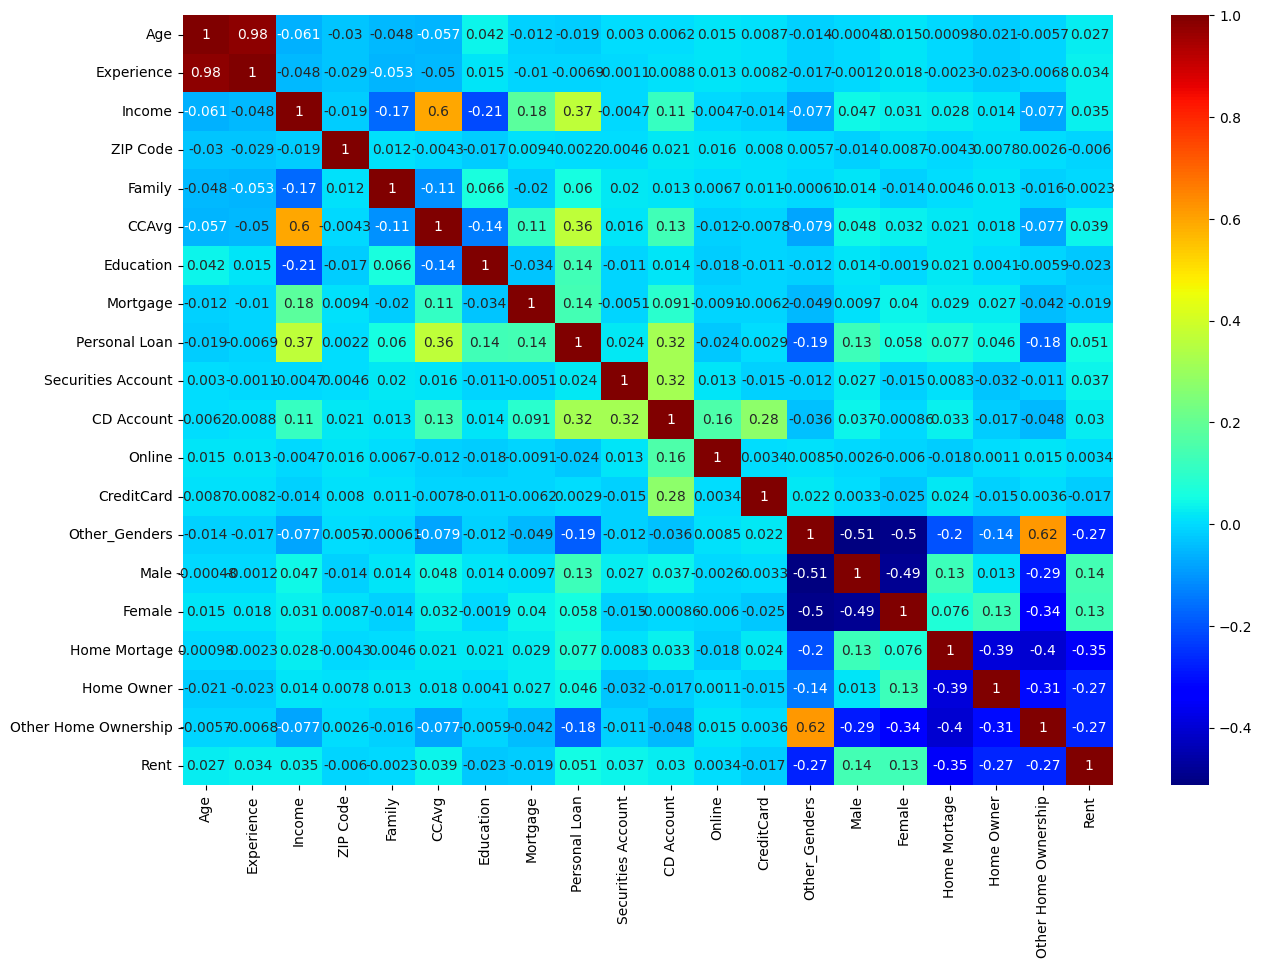

In [68]:
plt.figure(figsize=(15,10))
sns.heatmap(corr_data, cmap='jet',annot=True)   

From the above correlation data plot, we can find 
1. personal loan is highly correlated with income, CCAvg, and CD amount an dnegative correlation wiht Other_Genders and Other Home Ownership
2. Experience and Age are highly correlated with each other  i.e 0.98
3. Income and CCAvg are positively correlated with eachother
4. Income have high negative correlation with family and education
Here zip code is not much related to any data so we can remove as it is no contributing on model prediction.

In [69]:
data.drop('ZIP Code',inplace=True,axis=1)

In [70]:
data.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Other_Genders,Male,Female,Home Mortage,Home Owner,Other Home Ownership,Rent
0,25,1,49.0,4,1.6,1,0,0,1,0,0.0,0,0,1,0,0,1,0,0
1,45,19,34.0,3,1.5,1,0,0,1,0,0.0,0,0,1,0,0,0,0,1
2,39,15,11.0,1,1.0,1,0,0,0,0,0.0,0,0,1,0,0,0,0,1
3,35,9,100.0,1,2.7,2,0,0,0,0,0.0,0,0,1,0,0,0,0,1
4,35,8,45.0,4,1.0,2,0,0,0,0,0.0,1,0,1,0,0,0,0,1


<Axes: xlabel='Age', ylabel='Experience'>

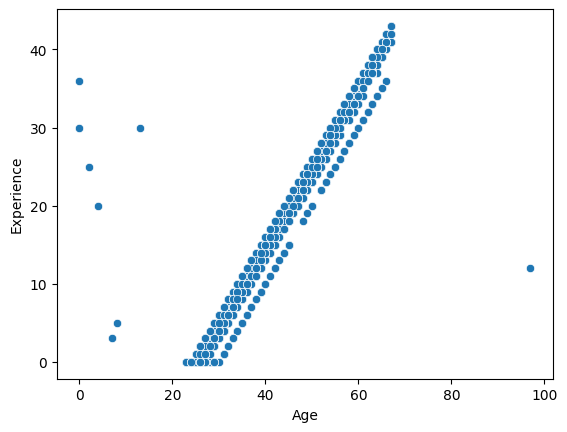

In [71]:
sns.scatterplot(x='Age',y='Experience',data=data)

<Axes: xlabel='Income', ylabel='CCAvg'>

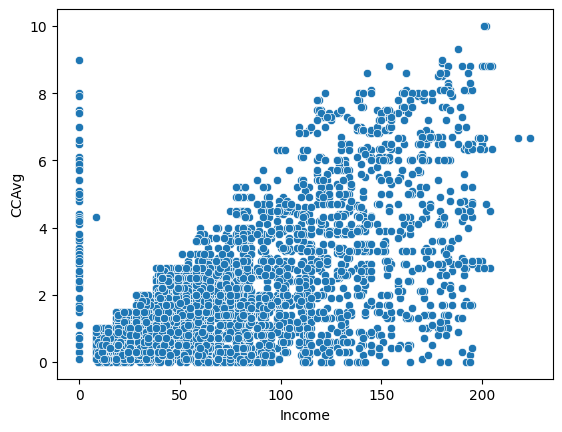

In [72]:
sns.scatterplot(x='Income',y='CCAvg',data=data)

<Axes: xlabel='Education', ylabel='count'>

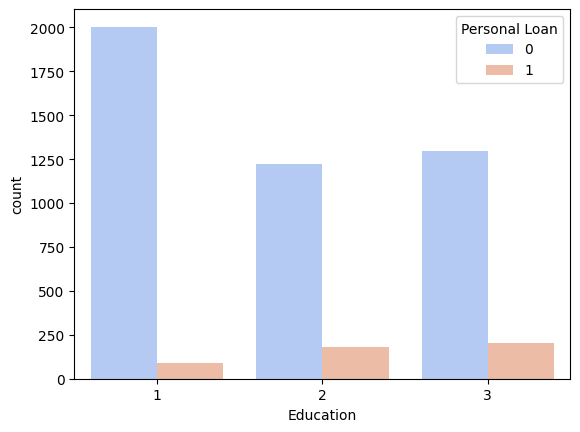

In [73]:
sns.countplot(data=data, x= data['Education'].sort_values(ascending=True),hue='Personal Loan',palette='coolwarm')

In [74]:
fetch_desctipt('Education')

"Education level (1: bachelor's degree, 2: master's degree, 3:advanced/professional degree)"

Hence, educated people have more personal loan

<Axes: xlabel='Education', ylabel='Income'>

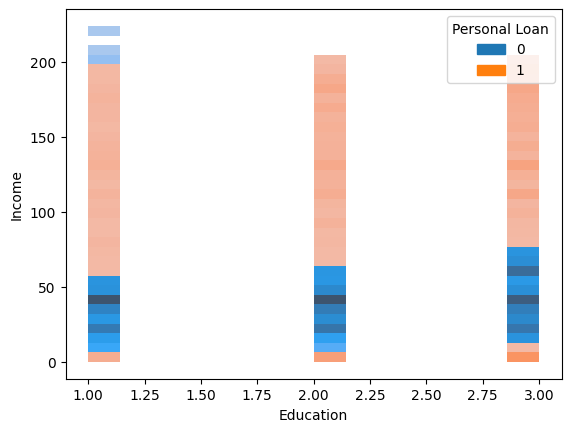

In [75]:
sns.histplot(x='Education',y='Income',data=data,hue='Personal Loan')

Now data preprocessing 

In [76]:
from sklearn.model_selection import train_test_split

Now setting X and y variable for training and testing data 

In [77]:
X = data.drop('Personal Loan',axis=1).values
y = data['Personal Loan'].values

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

Now using minmax scaler ot normalize the feature data X_train, and X_test

In [79]:
from sklearn.preprocessing import MinMaxScaler

In [80]:
scaler = MinMaxScaler()

In [81]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Now creating model for Personal Loan Acceptance Prediction

In [82]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

#Now building a sequential model to trained on the data

In [83]:
X_train.shape

(2996, 18)

In [84]:
model = Sequential()

model.add(Dense(18,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(15,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(13,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(9,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

Now fitting the model in our taining dataset

In [85]:
model.fit(x=X_train,y=y_train,epochs=25,batch_size=150,validation_data=(X_test,y_test))

Epoch 1/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.6284 - val_loss: 0.5372
Epoch 2/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.5031 - val_loss: 0.3904
Epoch 3/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.3888 - val_loss: 0.3504
Epoch 4/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.3518 - val_loss: 0.3380
Epoch 5/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.3462 - val_loss: 0.3266
Epoch 6/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3474 - val_loss: 0.3164
Epoch 7/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3370 - val_loss: 0.3070
Epoch 8/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3123 - val_loss: 0.2978
Epoch 9/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3084 - val_loss: 0.2867
Epoch 10/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2604 - val_loss: 0.2750
Epoch 11/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2840 - val_loss: 0.2637
Epoch 12/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2

Now saving the model

In [86]:
from tensorflow.keras.models import load_model

In [88]:
#model.save('Personal_loanAcceptance_prediction_model.h5')

In [89]:
model.history.history

{'loss': [0.6037366390228271,
  0.4696769714355469,
  0.3922603726387024,
  0.3622819781303406,
  0.35239332914352417,
  0.34057918190956116,
  0.3287428021430969,
  0.3172961473464966,
  0.30612674355506897,
  0.2961617410182953,
  0.285849392414093,
  0.27222493290901184,
  0.26299983263015747,
  0.2577158212661743,
  0.25338974595069885,
  0.2501369118690491,
  0.24124781787395477,
  0.2343894988298416,
  0.22742481529712677,
  0.23077131807804108,
  0.22495903074741364,
  0.21501438319683075,
  0.2136637568473816,
  0.21569186449050903,
  0.216047465801239],
 'val_loss': [0.5372477173805237,
  0.3903544843196869,
  0.3503626585006714,
  0.33802542090415955,
  0.3266488015651703,
  0.31642577052116394,
  0.30704137682914734,
  0.2978452742099762,
  0.28672415018081665,
  0.27496466040611267,
  0.26373380422592163,
  0.2535110116004944,
  0.2439381331205368,
  0.23517419397830963,
  0.22898687422275543,
  0.22330324351787567,
  0.21738630533218384,
  0.21267516911029816,
  0.20814445

In [90]:
# Now converting losses to data frame
losses = pd.DataFrame(model.history.history)

In [91]:
losses.head()

,loss,val_loss
0,0.603737,0.537248
1,0.469677,0.390354
2,0.392260,0.350363
3,0.362282,0.338025
4,0.352393,0.326649


<Axes: >

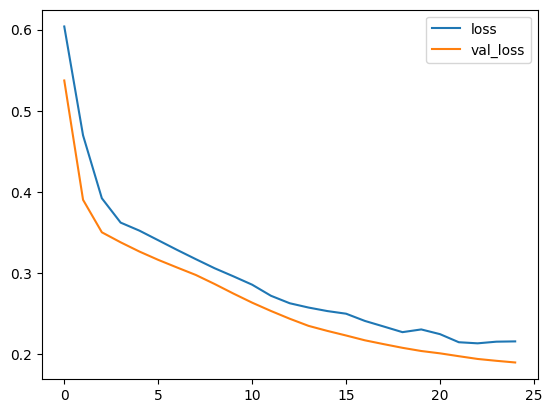

In [92]:
losses.plot()

It looks like our training loss and validation loss are both decreasing

Now creating prediction for X_test data and calculating classification_report and confusion_matrix

In [93]:
from sklearn.metrics import classification_report,confusion_matrix

Here, predicting on X_test data and 
if the predicted value greater than 0.5 it is considered positive prediction 
Otherwise negative prediction
and converting obtained boolean array from above steps into integer value 
i.e 0: False, 1:True

In [94]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [95]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1795
           1       0.00      0.00      0.00       203

    accuracy                           0.90      1998
   macro avg       0.45      0.50      0.47      1998
weighted avg       0.81      0.90      0.85      1998



C:\Users\User\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


model have accuracy 90%

In [96]:
confusion_matrix(y_test,predictions)

array([[1795,    0],
       [ 203,    0]], dtype=int64)

True Positive (TP): 1795 
True Negative(NP):203
False Positive (FP):0
False Negative(FN):0

In [99]:
import re

In [109]:
pairs = [
    ["start", ["I can help with that. Can you provide me some information? Let's start with your age.", "age"]],
    ["age", ["Got it. How many years of experience do you have?", "experience"]],
    ["experience", ["Great! What's your annual income (in thousands)?", "income"]],
    ["income", ["Thanks! How many family members do you have?", "family"]],
    ["family", ["What is your average monthly spending with the credit card (in thousands)?", "ccavg"]],
    ["ccavg", ["What's your education level (1: bachelor's, 2: master's, 3: advanced/professional degree)?", "education"]],
    ["education", ["Do you have a mortgage? If yes, what is the value (in thousands)? If none, type 0.", "mortgage"]],
    ["mortgage", ["Do you have a securities account with the bank? (yes/no)", "securities"]],
    ["securities", ["Do you have a certificate of deposit (CD) account with the bank? (yes/no)", "cd"]],
    ["cd", ["Do you use internet banking facilities? (yes/no)", "online"]],
    ["online", ["Do you use a credit card issued by the bank? (yes/no)", "creditcard"]],
    ["creditcard", ["Type your gender 'M' for male, 'F' for female and 'O' for other", "gender"]],
    ["gender", ["Type your Home Ownership Status: Home Owner, Rent, Home Mortgage or other.", "home_ownership"]],
    ["home_ownership", ["Thanks for the information. Let me process your loan acceptance prediction."]]
]

# Dictionary to store user responses
responses = {}

def conversation_handler(prompt, key):
    user_input = input(f"Bot: {prompt}\nYou: ").strip()
    if key in ["securities", "cd", "online", "creditcard"]:
        responses[key] = 1 if user_input.lower() == 'yes' else 0
    else:
        responses[key] = user_input
    return key

def get_prediction(features):
    prediction = model.predict(np.array([features]))
    return 'Loan Accepted' if prediction[0][0] > 0.5 else 'Loan Rejected'

continue_chat = True  # Flag to continue the conversation

# Start conversation
step = "start"
while continue_chat:
    for pair in pairs:
        if step == pair[0]:
            key = conversation_handler(pair[1][0], pair[1][1])
            if key == 'home_ownership':
                # Gather features for prediction
                try:
                    age = int(responses.get('age', 0))
                    experience = int(responses.get('experience', 0))
                    income = int(responses.get('income', 0))
                    family = int(responses.get('family', 0))
                    ccAvg = float(responses.get('ccavg', 0))
                    education = int(responses.get('education', 0))
                    mortgage = int(responses.get('mortgage', 0))
                    securities = responses.get('securities', 0)
                    cd = responses.get('cd', 0)
                    online = responses.get('online', 0)
                    credit_card = responses.get('creditcard', 0)
                    gender = responses.get('gender', 'O').upper()
                    male = 1 if gender == 'M' else 0
                    female = 1 if gender == 'F' else 0
                    other_genders = 1 if gender == 'O' else 0
                    home_ownership = responses.get('home_ownership', '').lower()
                    home_mortgage = 1 if home_ownership == 'home mortgage' else 0
                    home_owner = 1 if home_ownership == 'home owner' else 0
                    rent = 1 if home_ownership == 'rent' else 0
                    other_home_owner = 1 if home_ownership == 'other' else 0

                    features = [
                        age, experience, income, family, ccAvg, education, mortgage,
                        securities, cd, online, credit_card,
                        male, female, other_genders,
                        home_mortgage, home_owner, other_home_owner, rent
                    ]

                    # Normalize features
                    scaled_features = scaler.transform([features])
                    result = get_prediction(scaled_features[0])
                    print("Bot:", result)
                    continue_chat = False  # Exit the conversation loop after prediction

                except Exception as e:
                    print("Bot:", f"Error processing input: {e}")
                    continue_chat = False  # Exit the conversation loop on error
            step = key
            break

        if not continue_chat:
            break

Bot: I can help with that. Can you provide me some information? Let's start with your age.
You:  23
Bot: Got it. How many years of experience do you have?
You:  1
Bot: Great! What's your annual income (in thousands)?
You:  20
Bot: Thanks! How many family members do you have?
You:  5
Bot: What is your average monthly spending with the credit card (in thousands)?
You:  15
Bot: What's your education level (1: bachelor's, 2: master's, 3: advanced/professional degree)?
You:  1
Bot: Do you have a mortgage? If yes, what is the value (in thousands)? If none, type 0.
You:  0
Bot: Do you have a securities account with the bank? (yes/no)
You:  no
Bot: Do you have a certificate of deposit (CD) account with the bank? (yes/no)
You:  no
Bot: Do you use internet banking facilities? (yes/no)
You:  yes
Bot: Do you use a credit card issued by the bank? (yes/no)
You:  no
Bot: Type your gender 'M' for male, 'F' for female and 'O' for other
You:  f
Bot: Type your Home Ownership Status: Home Owner, Rent, Hom

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Bot: Loan Rejected
